# Importing necessary libraries

In [275]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
import plotly.express as px
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
import pickle

# Retrieve data

In [246]:
data=pd.read_csv("healthcare-dataset-stroke-data.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Know more about data

In [247]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [248]:
data.describe().round(1)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.0,5110.0,5110.0,5110.0,5110.0,4909.0,5110.0
mean,36517.8,43.2,0.1,0.1,106.1,28.9,0.0
std,21161.7,22.6,0.3,0.2,45.3,7.9,0.2
min,67.0,0.1,0.0,0.0,55.1,10.3,0.0
25%,17741.2,25.0,0.0,0.0,77.2,23.5,0.0
50%,36932.0,45.0,0.0,0.0,91.9,28.1,0.0
75%,54682.0,61.0,0.0,0.0,114.1,33.1,0.0
max,72940.0,82.0,1.0,1.0,271.7,97.6,1.0


<AxesSubplot:>

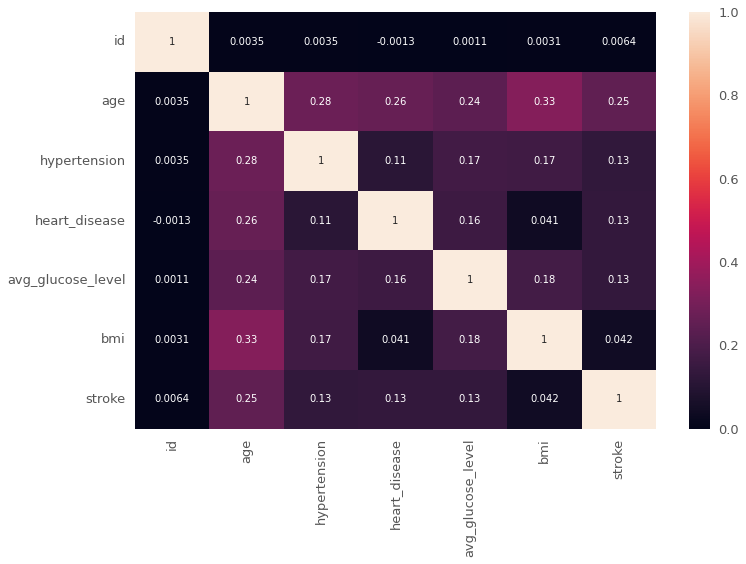

In [249]:
sns.heatmap(data.corr(),annot=True)

<AxesSubplot:xlabel='gender', ylabel='bmi'>

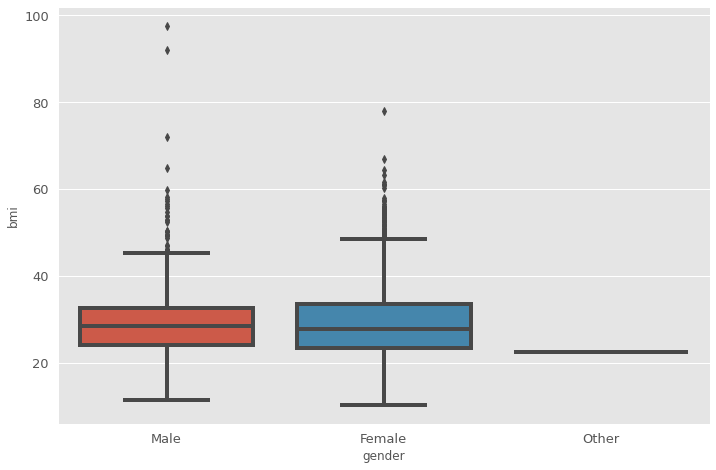

In [250]:
sns.boxplot(x=data['gender'],y=data['bmi'])

<AxesSubplot:xlabel='bmi', ylabel='age'>

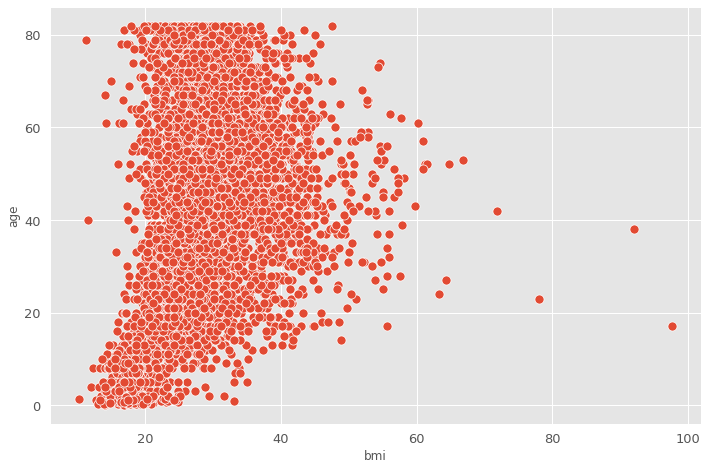

In [251]:
sns.scatterplot(data=data,x='bmi',y='age')

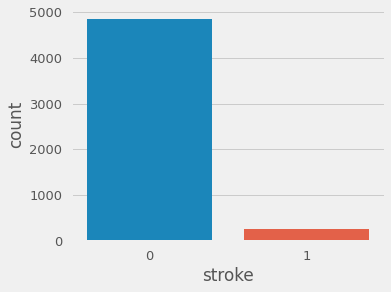

In [252]:
plt.style.use("fivethirtyeight")
fig = plt.gcf()
fig.set_size_inches(5, 4)
sns.countplot(data=data,x='stroke')
plt.show()

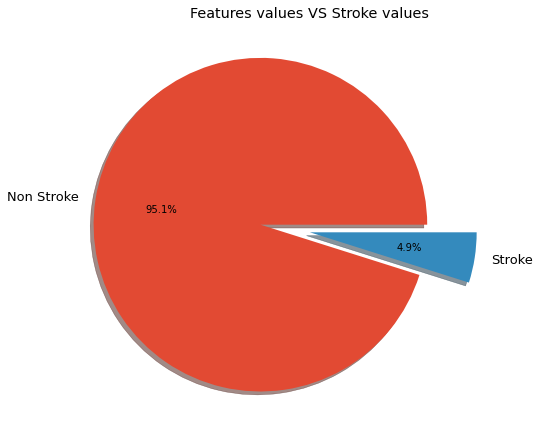

In [276]:
plt.style.use("ggplot")
plt.title("Features values VS Stroke values")
plt.pie(np.array(data['stroke'].value_counts()),labels=['Non Stroke','Stroke'],explode=[0.3,0],autopct='%1.1f%%',shadow=True)
plt.show()

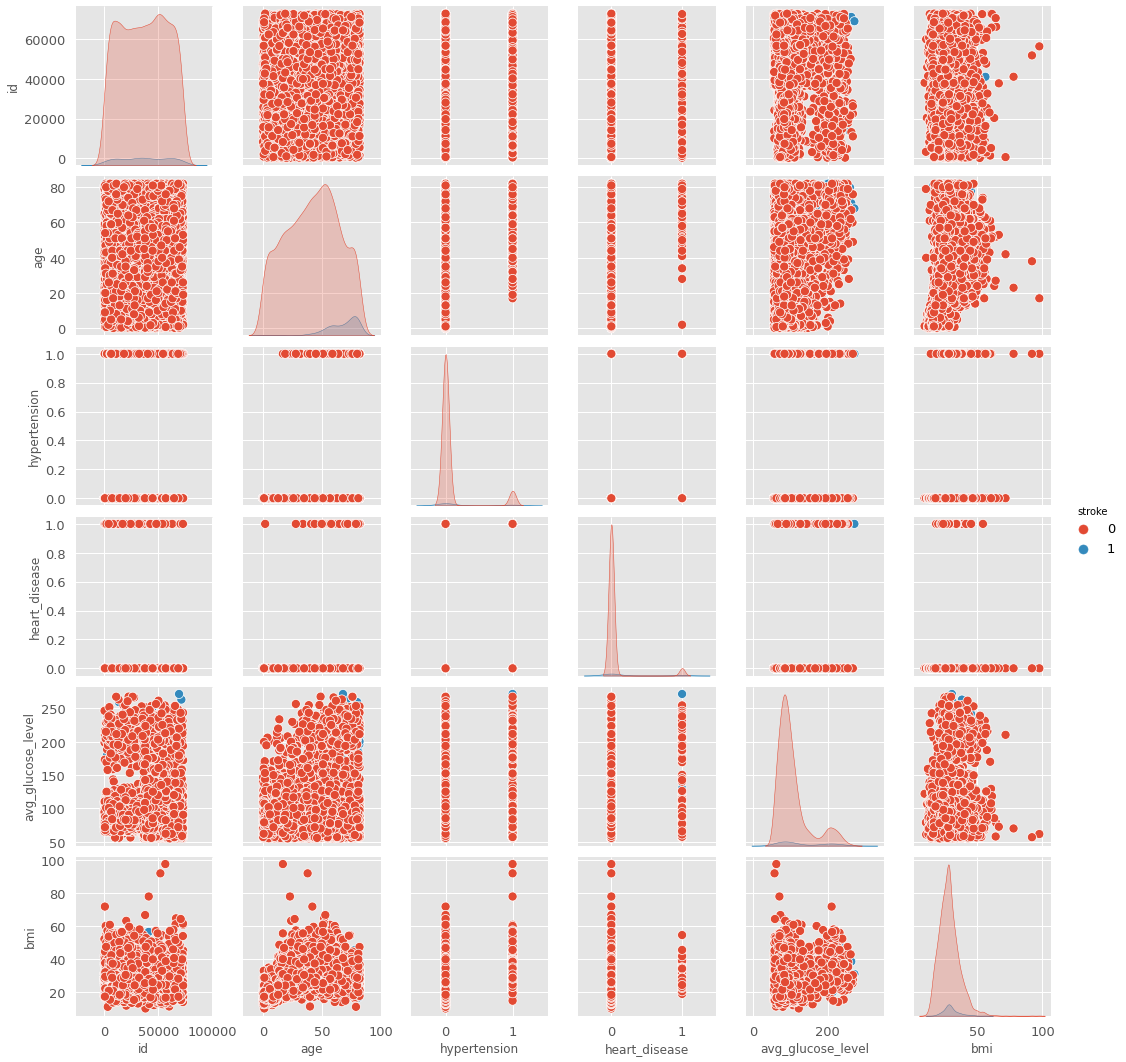

In [281]:
sns.pairplot(data=data,hue='stroke')

# Get rid of missing values

In [255]:
data.bmi=data.bmi.fillna(value=data.bmi.mean())

# Encoding categorical values

In [256]:
data_dummies = pd.get_dummies(data, columns = ['gender', 'ever_married','work_type','Residence_type','smoking_status'])

In [257]:
data_dummies

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.600000,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1,51676,61.0,0,0,202.21,28.893237,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.500000,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.400000,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,1,0,174.12,24.000000,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,28.893237,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
5106,44873,81.0,0,0,125.20,40.000000,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
5107,19723,35.0,0,0,82.99,30.600000,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
5108,37544,51.0,0,0,166.29,25.600000,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0


# Split the data into features and the target (Stroke)

In [287]:
X=data_dummies.drop(["stroke","id"],axis=1)
y=data_dummies.stroke

# Dimensionality reduction by selectKbest

In [288]:
X_new = SelectKBest(chi2, k=10).fit_transform(X, y)

In [289]:
X_new.shape

(5110, 10)

# Split data to train and test

In [290]:
X_train, X_test, y_train, y_test = train_test_split(X_new,y,test_size=0.2)
X_train.shape

(4088, 10)

In [291]:
X_test.shape

(1022, 10)

# Test models

In [292]:
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)*100

95.69471624266144

In [293]:
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
svm.score(X_test, y_test)*100

95.49902152641879

In [294]:
rf = RandomForestClassifier(n_estimators=9)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)*100

95.2054794520548

In [295]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt.score(X_test, y_test)*100

92.56360078277886

# Evaluation model

<AxesSubplot:>

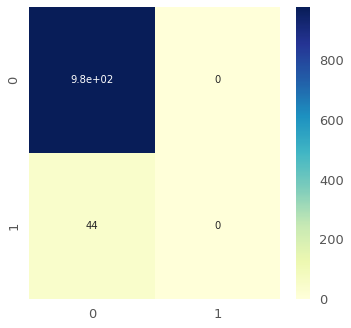

In [297]:
confusion_lr=confusion_matrix(y_test,lr.predict(X_test))
plt.figure(figsize=(5,5))
sns.heatmap(confusion_lr,annot=True, cmap="YlGnBu")

In [298]:
print(classification_report(y_test,lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       978
           1       0.00      0.00      0.00        44

    accuracy                           0.96      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.92      0.96      0.94      1022



# Save model 

In [299]:
with open('model_pickle','wb') as file:
    pickle.dump(lr,file)